In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants

In [2]:
PATH_DATA = Path.cwd().parent.parent.parent / 'data'
PATH_DATA.exists()

True

In [3]:
PATH_RESULTS_ARCHAEA = (PATH_DATA / "results" / "archaea")
PATH_RESULTS_ARCHAEA.exists()

True

In [4]:
PATH_RESULTS_BACTERIA = (PATH_DATA / "results" / "bacteria")
PATH_RESULTS_BACTERIA.exists()

True

# Archaea

In [5]:
df_archaea = pd.read_csv(PATH_RESULTS_ARCHAEA / 'mfa_archaea.csv', sep=';', dtype=str)
df_archaea = df_archaea.replace({',': '.'}, regex=True)
df_archaea = df_archaea.apply(pd.to_numeric, errors='ignore')
df_archaea

,name,url,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq
0,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-20.0,-61.994322,2.952111,0.998501,1.351540
1,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-19.0,-58.900917,2.945046,0.998499,1.351540
2,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-18.0,-55.807529,2.937238,0.998497,1.351540
3,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-17.0,-52.714165,2.928565,0.998494,1.351540
4,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-16.0,-49.620837,2.918873,0.998492,1.351540
...,...,...,...,...,...,...,...,...,...,...
195647,Vulcanisaeta_thermophila,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_thermophila_segment_3,674198,0.490012,16.0,24.122574,1.608172,0.997867,1.240771
195648,Vulcanisaeta_thermophila,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_thermophila_segment_3,674198,0.490012,17.0,25.639228,1.602452,0.997806,1.240771
195649,Vulcanisaeta_thermophila,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_thermophila_segment_3,674198,0.490012,18.0,27.154290,1.597311,0.997750,1.240771
195650,Vulcanisaeta_thermophila,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_thermophila_segment_3,674198,0.490012,19.0,28.668059,1.592670,0.997698,1.240771


In [6]:
df_archaea.dtypes

name           object
url            object
sequence       object
seq_length      int64
GC_content    float64
Q             float64
Tau(Q)        float64
D(Q)          float64
r_squared     float64
Delta_Dq      float64
dtype: object

## Dq vs GC

In [7]:
df_composite_key_archaea = df_archaea.drop_duplicates(subset=['GC_content', 'Delta_Dq'])
df_composite_key_archaea.shape

(4752, 10)

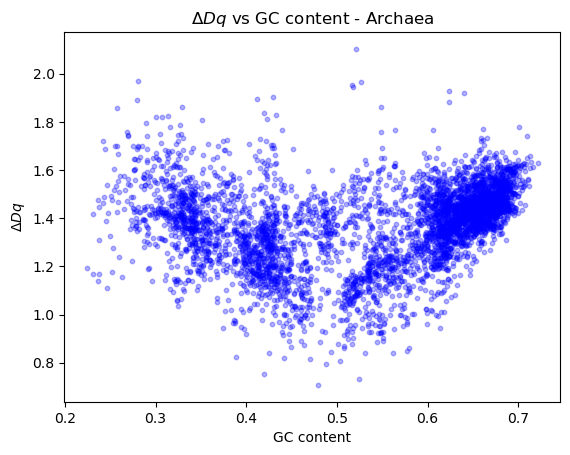

In [72]:
plt.scatter(
    x=df_composite_key_archaea['GC_content'],
    y=df_composite_key_archaea['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.3
)

plt.title(r'$\Delta Dq$ vs GC content - Archaea')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

plt.show()

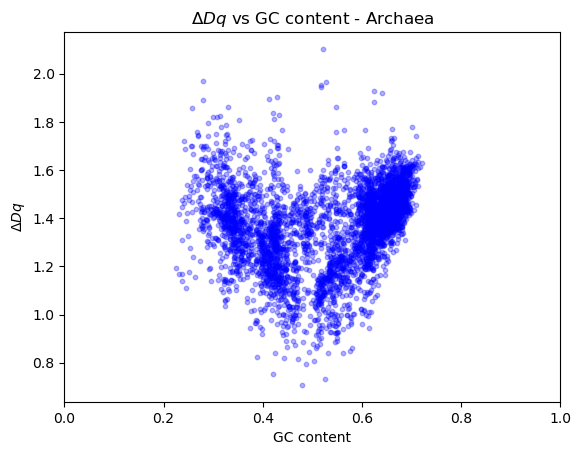

In [74]:
plt.scatter(
    x=df_composite_key_archaea['GC_content'],
    y=df_composite_key_archaea['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.3
)

plt.title(r'$\Delta Dq$ vs GC content - Archaea')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

plt.xlim(0, 1)

plt.show()

# Bacteria

In [9]:
df_bacteria_0_35k = pd.read_csv(PATH_RESULTS_BACTERIA / 'mfa_bacteria_0_35000.csv', sep=';', dtype=str)
df_bacteria_0_35k

,name,url,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq
0,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense,3606331,"0,5426839632856774","-20,0","-72,66465514634189","3,4602216736353277","0,9698146394684455","2,136053987504341"
1,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense,3606331,"0,5426839632856774","-19,0","-69,06562170824506","3,453281085412253","0,9700241704080936","2,136053987504341"
2,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense,3606331,"0,5426839632856774","-18,0","-65,4663970739676","3,4455998459982946","0,9702559315728465","2,136053987504341"
3,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense,3606331,"0,5426839632856774","-17,0","-61,866949855097616","3,437052769727645","0,9705136434109122","2,136053987504341"
4,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense,3606331,"0,5426839632856774","-16,0","-58,267243922844344","3,4274849366379025","0,9708019026058612","2,136053987504341"
...,...,...,...,...,...,...,...,...,...,...
5539259,PVC_group_bacterium,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pvc_group_bacterium_segment_3,1460619,"0,6363076202623682","16,0","21,465132664000123","1,4310088442666749","0,9976833291538687","1,4348619472405753"
5539260,PVC_group_bacterium,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pvc_group_bacterium_segment_3,1460619,"0,6363076202623682","17,0","22,81927140198009","1,4262044626237556","0,9976479303763938","1,4348619472405753"
5539261,PVC_group_bacterium,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pvc_group_bacterium_segment_3,1460619,"0,6363076202623682","18,0","24,172991159683413","1,4219406564519654","0,9976172541412566","1,4348619472405753"
5539262,PVC_group_bacterium,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pvc_group_bacterium_segment_3,1460619,"0,6363076202623682","19,0","25,526317899456267","1,4181287721920148","0,9975905129762491","1,4348619472405753"


In [15]:
df_bacteria_35k_52k = pd.read_csv(PATH_RESULTS_BACTERIA / 'mfa_bacteria_35000_52909.csv', sep=';', dtype=str)
df_bacteria_35k_52k

,name,url,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq
0,Pseudodesulfovibrio_indicus,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pseudodesulfovibrio_indicus,3966573,"0,634883563216913","-20,0","-58,22372404009182","2,77255828762342","0,998439748513986","1,2478087067971309"
1,Pseudodesulfovibrio_indicus,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pseudodesulfovibrio_indicus,3966573,"0,634883563216913","-19,0","-55,31755996878647","2,7658779984393234","0,9984547716999835","1,2478087067971309"
2,Pseudodesulfovibrio_indicus,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pseudodesulfovibrio_indicus,3966573,"0,634883563216913","-18,0","-52,41184580682713","2,7585182003593225","0,9984714685532762","1,2478087067971309"
3,Pseudodesulfovibrio_indicus,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pseudodesulfovibrio_indicus,3966573,"0,634883563216913","-17,0","-49,506696847686705","2,750372047093706","0,9984901100821286","1,2478087067971309"
4,Pseudodesulfovibrio_indicus,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,pseudodesulfovibrio_indicus,3966573,"0,634883563216913","-16,0","-46,602267713291056","2,7413098654877093","0,9985110304927113","1,2478087067971309"
...,...,...,...,...,...,...,...,...,...,...
3417591,Zymomonas_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_sp._segment_3,640617,"0,45795381639887794","16,0","24,041505273994705","1,6027670182663136","0,9983998418704588","1,2856818438370474"
3417592,Zymomonas_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_sp._segment_3,640617,"0,45795381639887794","17,0","25,564688499910517","1,5977930312444073","0,9983302561291089","1,2856818438370474"
3417593,Zymomonas_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_sp._segment_3,640617,"0,45795381639887794","18,0","27,08653137280582","1,5933253748709306","0,9982699578190471","1,2856818438370474"
3417594,Zymomonas_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_sp._segment_3,640617,"0,45795381639887794","19,0","28,607184008911975","1,5892880004951098","0,9982175466913437","1,2856818438370474"


## Dq vs GC

In [12]:
df_composite_key_bacteria_0_35k = df_bacteria_0_35k.drop_duplicates(subset=['GC_content', 'Delta_Dq'])
df_composite_key_bacteria_0_35k.shape

(134918, 10)

In [13]:
df_composite_key_bacteria_0_35k = df_composite_key_bacteria_0_35k.replace({',': '.'}, regex=True)
df_composite_key_bacteria_0_35k = df_composite_key_bacteria_0_35k.apply(pd.to_numeric, errors='ignore')

In [16]:
df_composite_key_bacteria_35k_52k = df_bacteria_35k_52k.drop_duplicates(subset=['GC_content', 'Delta_Dq'])
df_composite_key_bacteria_35k_52k.shape

(68961, 10)

In [17]:
df_composite_key_bacteria_35k_52k = df_composite_key_bacteria_35k_52k.replace({',': '.'}, regex=True)
df_composite_key_bacteria_35k_52k = df_composite_key_bacteria_35k_52k.apply(pd.to_numeric, errors='ignore')

In [20]:
df_composite_key_bacteria = pd.concat([df_composite_key_bacteria_0_35k, df_composite_key_bacteria_35k_52k], ignore_index=True)
print(df_composite_key_bacteria.shape)
df_composite_key_bacteria

(203879, 10)


,name,url,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq
0,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense,3606331,0.542684,-20.0,-72.664655,3.460222,0.969815,2.136054
1,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense_segment_1,1202110,0.544933,-20.0,-67.746182,3.226009,0.942334,1.909285
2,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense_segment_2,1202110,0.543961,-20.0,-66.961196,3.188628,0.962745,1.863879
3,Abditibacterium_utsteinense,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abditibacterium_utsteinense_segment_3,1202110,0.539157,-20.0,-68.399248,3.257107,0.933928,1.927774
4,Abiotrophia_defectiva,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,abiotrophia_defectiva,2043439,0.469444,-20.0,-51.983359,2.475398,0.996970,0.811359
...,...,...,...,...,...,...,...,...,...,...
203874,Zymomonas_mobilis,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_mobilis_segment_3,685454,0.465150,-20.0,-60.810954,2.895760,0.994370,1.295974
203875,Zymomonas_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_sp.,1921851,0.458903,-20.0,-63.408908,3.019472,0.996031,1.433338
203876,Zymomonas_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_sp._segment_1,640617,0.459140,-20.0,-62.520256,2.977155,0.988585,1.401800
203877,Zymomonas_sp.,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ba...,zymomonas_sp._segment_2,640617,0.459615,-20.0,-61.116224,2.910296,0.993888,1.329194


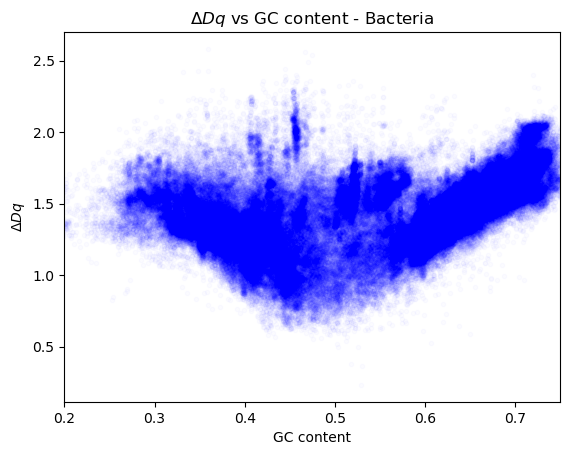

In [75]:
plt.scatter(
    x=df_composite_key_bacteria['GC_content'],
    y=df_composite_key_bacteria['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.015
)

plt.title(r'$\Delta Dq$ vs GC content - Bacteria')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

plt.xlim(0.2, 0.75)

plt.show()

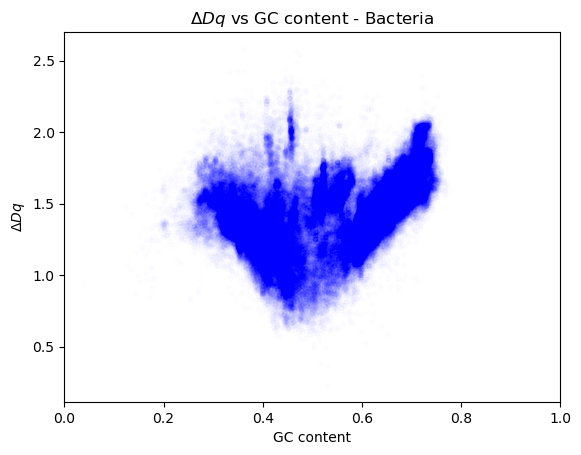

In [76]:
plt.scatter(
    x=df_composite_key_bacteria['GC_content'],
    y=df_composite_key_bacteria['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.009
)

plt.title(r'$\Delta Dq$ vs GC content - Bacteria')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

plt.xlim(0, 1)

plt.show()